<a href="https://colab.research.google.com/github/tousifo/ml_notebooks/blob/main/qml_analysis_vs_ml%2C_dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# --- Snippet 1 (Final Working Version) ---

# Step 1: Install Conda for Colab
print("--- Step 1: Installing Conda for Colab ---")
!pip install -q condacolab
import condacolab
condacolab.install()

# Step 2: Create a clean environment, now explicitly including qiskit-algorithms.
print("\n--- Step 2: Creating 'qml_project' conda environment ---")
!conda create -n qml_project -y python=3.11 qiskit-machine-learning qiskit-algorithms tensorflow xgboost pandas scikit-learn

# Step 3: Activate the environment and run our setup script.
print("\n--- Step 3: Activating environment and running setup script ---")
setup_script = """
import os
import zipfile
import numpy as np
import pandas as pd
import tensorflow as tf
import qiskit
from qiskit_algorithms.utils import algorithm_globals

print("\\n--- Environment Verification ---")
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)
algorithm_globals.random_seed = SEED

print(f"Global random seed set to {SEED}.")
print(f"Python Version: {os.sys.version.split()[0]}")
print(f"TensorFlow Version: {tf.__version__}")
print(f"Qiskit Version: {qiskit.__version__}")
print(f"Pandas Version: {pd.__version__}")
print(f"Numpy Version: {np.__version__}")

zip_path = '/content/leucumia.zip'
extract_path = '/content/leukemia_data/'

print("\\n--- Preparing Image Data ---")
if not os.path.exists(extract_path):
    os.makedirs(extract_path)
    print(f"Created directory: {extract_path}")
else:
    print(f"Directory already exists: {extract_path}")

try:
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print(f"Successfully unzipped '{zip_path}' to '{extract_path}'")
    segmented_path = os.path.join(extract_path, 'Segmented')
    if os.path.exists(segmented_path):
        print(f"Verified: 'Segmented' directory found.")
    else:
        print(f"WARNING: 'Segmented' directory not found.")
except FileNotFoundError:
    print(f"ERROR: File '{zip_path}' not found. Please upload it.")
except Exception as e:
    print(f"An error occurred: {e}")
"""

with open("run_setup.py", "w") as f:
    f.write(setup_script)

# Execute the script using the new environment
!source /usr/local/etc/profile.d/conda.sh && conda activate qml_project && python run_setup.py

--- Step 1: Installing Conda for Colab ---
✨🍰✨ Everything looks OK!

--- Step 2: Creating 'qml_project' conda environment ---
Channels:
 - conda-forge
Platform: linux-64
Solving environment: - \ | / done


==> WARNING: A newer version of conda exists. <==
    current version: 24.11.2
    latest version: 25.7.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local/envs/qml_project

  added / updated specs:
    - pandas
    - python=3.11
    - qiskit-algorithms
    - qiskit-machine-learning
    - scikit-learn
    - tensorflow
    - xgboost


The following NEW packages will be INSTALLED:

  _libgcc_mutex      conda-forge/linux-64::_libgcc_mutex-0.1-conda_forge 
  _openmp_mutex      conda-forge/linux-64::_openmp_mutex-4.5-2_gnu 
  _python_abi3_supp~ conda-forge/noarch::_python_abi3_support-1.0-hd8ed1ab_2 
  _x86_64-microarch~ conda-forge/noarch::_x86_64-microarch-level-3-2_broadwell 
  absl-py     

In [ ]:
# --- Snippet 2: Data Loading and Initial Inspection ---

# We will use the same method as before to run our code inside the
# 'qml_project' conda environment.

# Define the Python code for this snippet
data_loading_script = """
import os
import pandas as pd
import numpy as np

print("--- Snippet 2: Data Loading and Initial Inspection ---")

# Define file paths
BASE_PATH = '/content/'
TABULAR_PATHS = {
    "Breast_Cancer": os.path.join(BASE_PATH, 'breast.csv'),
    "Sonar": os.path.join(BASE_PATH, 'sonar.csv'),
    "Lung_Cancer": os.path.join(BASE_PATH, 'lung_cancer.csv'),
    "SCD": os.path.join(BASE_PATH, 'Sudden Cardiac Death Holter Database.csv')
}
IMAGE_PATH = '/content/leukemia_data/Segmented/'

# --- 1. Load and Inspect Tabular Datasets ---
print("\\n--- Loading Tabular Datasets ---")
loaded_data = {}
for name, path in TABULAR_PATHS.items():
    try:
        df = pd.read_csv(path)
        loaded_data[name] = df
        print(f"\\n--- {name} ---")
        print(f"Shape: {df.shape}")
        # Check for missing values
        missing_vals = df.isnull().sum().sum()
        print(f"Total Missing Values: {missing_vals}")
        if missing_vals > 0:
            print("Preview of columns with most missing values:")
            print(df.isnull().sum().sort_values(ascending=False).head(3))
        print("Data Preview:")
        print(df.head(3))
    except FileNotFoundError:
        print(f"\\n--- {name} ---")
        print(f"ERROR: File not found at {path}")
    except Exception as e:
        print(f"\\n--- {name} ---")
        print(f"ERROR loading file: {e}")


# --- 2. Load and Inspect Image Dataset Paths ---
print("\\n\\n--- Loading Image Dataset Paths ---")
image_data = []
try:
    for subdir, dirs, files in os.walk(IMAGE_PATH):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                # Determine label from subdirectory name
                label = "Benign"
                if "malignant" in subdir.lower():
                    label = "Malignant"

                image_data.append({
                    "path": os.path.join(subdir, file),
                    "label": label
                })

    if not image_data:
         print("ERROR: No images found in the specified directory.")
    else:
        df_images = pd.DataFrame(image_data)
        loaded_data["Leukemia"] = df_images
        print(f"Found {len(df_images)} images.")
        print(f"Shape of image DataFrame: {df_images.shape}")
        print("Label Distribution:")
        print(df_images['label'].value_counts())
        print("Data Preview:")
        print(df_images.head(3))
except FileNotFoundError:
    print(f"ERROR: Image directory not found at {IMAGE_PATH}")
except Exception as e:
    print(f"ERROR processing images: {e}")

"""

# Write the script to a file
with open("run_data_loading.py", "w") as f:
    f.write(data_loading_script)

# Execute the script using the conda environment's python
!source /usr/local/etc/profile.d/conda.sh && conda activate qml_project && python run_data_loading.py

--- Snippet 2: Data Loading and Initial Inspection ---

--- Loading Tabular Datasets ---

--- Breast_Cancer ---
Shape: (569, 33)
Total Missing Values: 569
Preview of columns with most missing values:
Unnamed: 32    569
id               0
diagnosis        0
dtype: int64
Data Preview:
         id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0    842302         M  ...                  0.11890          NaN
1    842517         M  ...                  0.08902          NaN
2  84300903         M  ...                  0.08758          NaN

[3 rows x 33 columns]

--- Sonar ---
Shape: (208, 61)
Total Missing Values: 0
Data Preview:
   Freq_1  Freq_2  Freq_3  Freq_4  ...  Freq_58  Freq_59  Freq_60  Label
0  0.0200  0.0371  0.0428  0.0207  ...   0.0084   0.0090   0.0032      R
1  0.0453  0.0523  0.0843  0.0689  ...   0.0049   0.0052   0.0044      R
2  0.0262  0.0582  0.1099  0.1083  ...   0.0164   0.0095   0.0078      R

[3 rows x 61 columns]

--- Lung_Cancer ---
Shape: (59, 7)
Total Missin

In [ ]:
# --- Snippet 3 (Final Corrected Version): Preprocessing Pipeline Definition ---

# Define the Python code for this snippet
pipeline_definition_script = """
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from tqdm.auto import tqdm # Use tqdm.auto for better notebook integration
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

print("--- Snippet 3: Preprocessing Pipeline Definition ---")

# --- 1. Define Tabular Preprocessing Pipeline ---
# This pipeline will handle missing values, scale the data, and select the best 15 features.
tabular_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_classif, k=15))
])
print("\\n1. Tabular preprocessing pipeline defined successfully.")
print(tabular_pipeline)


# --- 2. Define Image Preprocessing and Embedding Logic ---
# This is more complex than a simple pipeline, so we define it as a reusable function.
# This function will take a list of image paths and return a 15-dimensional feature embedding.

def create_image_embedding_pipeline():
    # Load the pre-trained MobileNetV2 model without its final classification layer
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
    # Add a pooling layer to get a single feature vector per image
    x = GlobalAveragePooling2D()(base_model.output)
    embedding_model = Model(inputs=base_model.input, outputs=x)

    # Define the dimensionality reduction pipeline
    reduction_pipeline = Pipeline([
        ('pca', PCA(n_components=30)),
        ('selector', SelectKBest(score_func=f_classif, k=15))
    ])

    return embedding_model, reduction_pipeline

def process_images_to_embeddings(image_paths, embedding_model):
    \"\"\"
    Processes a list of images into embeddings using a pre-trained model.
    Includes a progress bar using tqdm.
    \"\"\"
    embedded_features = []
    # Use tqdm for a progress bar
    for path in tqdm(image_paths, desc="Generating Image Embeddings"):
        # Load and preprocess the image for MobileNetV2
        img = load_img(path, target_size=(128, 128))
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)

        # Get the embedding
        embedding = embedding_model.predict(img_array, verbose=0)
        embedded_features.append(embedding.flatten())

    return np.array(embedded_features)


print("\\n2. Image embedding function and dimensionality reduction pipeline defined successfully.")

# Example of creating the image processing components
# This just demonstrates that the functions work
try:
    image_embedder, image_reducer = create_image_embedding_pipeline()
    print("   - MobileNetV2 embedding model created.")
    print("   - PCA -> SelectKBest reduction pipeline created.")
    print(image_reducer)
except Exception as e:
    print(f"ERROR creating image pipelines: {e}")

print("\\nPreprocessing architecture is defined and ready for use in model training.")

"""

# Write the script to a file
with open("run_pipeline_definition.py", "w") as f:
    f.write(pipeline_definition_script)

# Re-run the environment creation, this time including tqdm
# And then execute the script.
# NOTE: It's often faster to just add tqdm to the existing environment,
# but for maximum stability, we will recreate it.
print("--- Recreating 'qml_project' conda environment with tqdm ---")
!conda create -n qml_project -y python=3.11 qiskit-machine-learning qiskit-algorithms tensorflow xgboost pandas scikit-learn tqdm

print("\n--- Executing script in the new environment ---")
!source /usr/local/etc/profile.d/conda.sh && conda activate qml_project && python run_pipeline_definition.py

--- Recreating 'qml_project' conda environment with tqdm ---
Channels:
 - conda-forge
Platform: linux-64
Solving environment: / - \ done


==> WARNING: A newer version of conda exists. <==
    current version: 24.11.2
    latest version: 25.7.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local/envs/qml_project

  added / updated specs:
    - pandas
    - python=3.11
    - qiskit-algorithms
    - qiskit-machine-learning
    - scikit-learn
    - tensorflow
    - tqdm
    - xgboost


The following NEW packages will be INSTALLED:

  _libgcc_mutex      conda-forge/linux-64::_libgcc_mutex-0.1-conda_forge 
  _openmp_mutex      conda-forge/linux-64::_openmp_mutex-4.5-2_gnu 
  _python_abi3_supp~ conda-forge/noarch::_python_abi3_support-1.0-hd8ed1ab_2 
  _x86_64-microarch~ conda-forge/noarch::_x86_64-microarch-level-3-2_broadwell 
  absl-py            conda-forge/noarch::absl-py-2.3.1-pyhd8ed1ab_0 
  a

In [ ]:
# --- Snippet 4 (Corrected): Model & Experiment Function Definition ---

# Define the Python code for this snippet
experiment_logic_script = """
import pandas as pd
import numpy as np
import os
import time
from tqdm.auto import tqdm

# Scikit-learn imports
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import balanced_accuracy_score, roc_auc_score

# Model imports
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier # Corrected import

# Qiskit imports
from qiskit.circuit.library import ZZFeatureMap, TwoLocal
from qiskit.primitives import Sampler
from qiskit_algorithms.optimizers import SPSA
from qiskit_machine_learning.algorithms.classifiers import VQC, QSVC

print("--- Snippet 4: Model & Experiment Function Definition ---")
SEED = 42

# --- 1. Define Model & Hyperparameter Grids ---
print("1. Defining model and hyperparameter grids...")

# A. Classical Models
models_and_params = {
    'LogisticRegression': {
        'model': LogisticRegression(random_state=SEED, max_iter=1000, solver='liblinear'),
        'params': {
            'classifier__C': [0.1, 1, 10],
            'classifier__penalty': ['l1', 'l2']
        }
    },
    'RBF_SVM': {
        'model': SVC(random_state=SEED, probability=True),
        'params': {
            'classifier__C': [0.1, 1, 10],
            'classifier__gamma': ['scale']
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(random_state=SEED),
        'params': {
            'classifier__n_estimators': [50, 100],
            'classifier__max_depth': [3, 5]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(random_state=SEED, eval_metric='logloss'),
        'params': {
            'classifier__n_estimators': [50, 100],
            'classifier__learning_rate': [0.05, 0.1]
        }
    }
}

# B. Deep Learning Model (MLP)
def create_mlp(meta, dropout_rate=0.2, l2_reg=0.001):
    # Scikeras provides metadata like n_features_in_
    n_features = meta["n_features_in_"]
    model = Sequential([
        Dense(64, activation='relu', input_shape=(n_features,), kernel_regularizer=tf.keras.regularizers.l2(l2_reg)),
        Dropout(dropout_rate),
        Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l2_reg)),
        Dense(1, activation='sigmoid')
    ])
    return model

# Updated KerasClassifier wrapper using SciKeras
models_and_params['MLP'] = {
    'model': KerasClassifier(
        model=create_mlp,
        loss="binary_crossentropy",
        optimizer="adam",
        verbose=0
    ),
    'params': {
        'classifier__batch_size': [16, 32],
        'classifier__epochs': [50, 100],
        'classifier__model__dropout_rate': [0.2, 0.3]
    }
}

# C. Quantum Models (placeholders)
models_and_params['QKSVM'] = { 'model': None, 'params': {} }
models_and_params['VQC'] = { 'model': None, 'params': {} }

print("   - Grids defined.")

# --- 2. Define the Main Experiment Runner Function ---
print("\\n2. Defining the main 'run_experiment' function...")

# (A simplified function is defined here for validation.
# The actual logic will be used in the next snippet)
def placeholder_experiment_runner():
    print("   - 'run_experiment' function placeholder is defined.")
    return True

placeholder_experiment_runner()

print("\\nExperiment architecture is defined and ready for pilot runs.")
"""

# Write the script to a file
with open("run_experiment_logic.py", "w") as f:
    f.write(experiment_logic_script)

# Re-create the conda environment, now including scikeras
print("--- Recreating 'qml_project' conda environment with scikeras ---")
!conda create -n qml_project -y python=3.11 qiskit-machine-learning qiskit-algorithms tensorflow xgboost pandas scikit-learn tqdm scikeras

print("\n--- Executing script in the new environment ---")
!source /usr/local/etc/profile.d/conda.sh && conda activate qml_project && python run_experiment_logic.py

--- Recreating 'qml_project' conda environment with scikeras ---
Channels:
 - conda-forge
Platform: linux-64
Solving environment: - \ | done


==> WARNING: A newer version of conda exists. <==
    current version: 24.11.2
    latest version: 25.7.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local/envs/qml_project

  added / updated specs:
    - pandas
    - python=3.11
    - qiskit-algorithms
    - qiskit-machine-learning
    - scikeras
    - scikit-learn
    - tensorflow
    - tqdm
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    scikeras-0.13.0            |     pyhd8ed1ab_0          27 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          27 KB

The following NEW packages will be INSTALLED:



In [ ]:
# --- Snippet 5 (Definitive Final Version): Pilot Run with Hybrid QNN ---

# Define the Python code for this snippet
pilot_run_script = """
import pandas as pd
import numpy as np
import os
import time
from tqdm.auto import tqdm

# Scikit-learn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import balanced_accuracy_score

# Classical Model
from sklearn.linear_model import LogisticRegression

# PyTorch and Qiskit
import torch
from torch import nn
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit.primitives import Estimator
from qiskit.quantum_info import SparsePauliOp
from qiskit_machine_learning.connectors import TorchConnector
from qiskit_machine_learning.neural_networks import EstimatorQNN

print("--- Snippet 5 (Definitive Final): Pilot Run with Hybrid QNN ---")
SEED = 42
np.random.seed(SEED)
torch.manual_seed(SEED)

# --- 1. Define Models ---
print("1. Defining models for pilot run...")

# A. Classical Model
lr_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_classif, k=10)),
    ('classifier', LogisticRegression(C=10, penalty='l1', random_state=SEED, max_iter=1000, solver='liblinear'))
])

# B. Hybrid Quantum Neural Network (QNN)
num_features = 10
feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
ansatz = RealAmplitudes(num_qubits=num_features, reps=3)

# Define the observable to measure
observable = SparsePauliOp("Z" * num_features)

# Use the EstimatorQNN for expectation value computation
qiskit_qnn = EstimatorQNN(
    circuit=feature_map.compose(ansatz),
    estimator=Estimator(),
    observables=observable,
    input_params=feature_map.parameters,
    weight_params=ansatz.parameters
)
initial_weights = (2 * np.random.rand(qiskit_qnn.num_weights) - 1)
torch_qnn = TorchConnector(qiskit_qnn, initial_weights=initial_weights)

# Define the full hybrid model
class HybridQNN(nn.Module):
    def __init__(self, qnn):
        super().__init__()
        self.qnn = qnn
        self.classical_layer = nn.Linear(1, 1) # QNN output is 1 value
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.qnn(x) # Pass the whole batch to TorchConnector
        x = self.classical_layer(x)
        return self.sigmoid(x)

pytorch_model = HybridQNN(torch_qnn)

# --- 2. Load and Prepare Data ---
print("\\n2. Loading and preparing Breast Cancer data...")
df = pd.read_csv('/content/breast.csv').drop(columns=['id', 'Unnamed: 32'])
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])
X, y = df.drop(columns=['diagnosis']), df['diagnosis']
X_sample, _, y_sample, _ = train_test_split(X, y, train_size=128, stratify=y, random_state=SEED)
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, stratify=y_sample, random_state=SEED)
print(f"Data prepared. Train size: {len(y_train)}, Test size: {len(y_test)}")

# --- 3. Run Experiment ---
# A. Logistic Regression
print(f"\\n--- Running: LogisticRegression ---")
start_time_lr = time.time()
lr_pipeline.fit(X_train, y_train)
lr_preds = lr_pipeline.predict(X_test)
lr_accuracy = balanced_accuracy_score(y_test, lr_preds)
lr_time = time.time() - start_time_lr
print(f"Accuracy: {lr_accuracy:.3f}, Time: {lr_time:.2f}s")

# B. Hybrid QNN
print(f"\\n--- Running: HybridQNN ---")
start_time_qnn = time.time()
preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_classif, k=num_features)),
]).fit(X_train, y_train)
X_train_q = torch.tensor(preprocessor.transform(X_train), dtype=torch.float32)
X_test_q = torch.tensor(preprocessor.transform(X_test), dtype=torch.float32)
y_train_q = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)
y_test_q = torch.tensor(y_test.values, dtype=torch.float32).reshape(-1, 1)

optimizer = torch.optim.Adam(pytorch_model.parameters(), lr=0.05)
loss_fn = torch.nn.BCELoss()
epochs = 10

pytorch_model.train()
for epoch in tqdm(range(epochs), desc="Training HybridQNN"):
    optimizer.zero_grad()
    output = pytorch_model(X_train_q)
    loss = loss_fn(output, y_train_q)
    loss.backward()
    optimizer.step()

pytorch_model.eval()
with torch.no_grad():
    test_output = pytorch_model(X_test_q)
    qnn_preds = (test_output >= 0.5).float().numpy()

qnn_accuracy = balanced_accuracy_score(y_test_q.numpy(), qnn_preds)
qnn_time = time.time() - start_time_qnn
print(f"Accuracy: {qnn_accuracy:.3f}, Time: {qnn_time:.2f}s")

print("\\n--- Pilot Run Summary ---")
results = pd.DataFrame([
    {'model': 'LogisticRegression', 'test_balanced_accuracy': lr_accuracy, 'fit_time_seconds': lr_time},
    {'model': 'HybridQNN', 'test_balanced_accuracy': qnn_accuracy, 'fit_time_seconds': qnn_time}
])
print(results.round(3))
"""

# Write the script to a file
with open("run_pilot_qnn.py", "w") as f:
    f.write(pilot_run_script)

# Re-create the conda environment with PyTorch
print("--- Recreating 'qml_project' conda environment with PyTorch ---")
!conda create -n qml_project -y python=3.11 pytorch qiskit-machine-learning qiskit-algorithms tensorflow xgboost pandas scikit-learn tqdm scikeras -c pytorch -c conda-forge

print("\n--- Executing script in the new environment ---")
!source /usr/local/etc/profile.d/conda.sh && conda activate qml_project && python run_pilot_qnn.py

--- Recreating 'qml_project' conda environment with PyTorch ---
Channels:
 - pytorch
 - conda-forge
Platform: linux-64
Solving environment: - \ | / done


==> WARNING: A newer version of conda exists. <==
    current version: 24.11.2
    latest version: 25.7.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local/envs/qml_project

  added / updated specs:
    - pandas
    - python=3.11
    - pytorch
    - qiskit-algorithms
    - qiskit-machine-learning
    - scikeras
    - scikit-learn
    - tensorflow
    - tqdm
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _openmp_mutex-4.5          |       3_kmp_llvm           7 KB  conda-forge
    blas-1.0                   |              mkl           1 KB  conda-forge
    cuda-cudart-12.4.127       |       he02047a_2          22 KB  conda-

In [ ]:
# --- Final Environment Setup (with GPU-enabled PyTorch) ---
#import condacolab
# This command ensures conda is installed and ready.
#condacolab.install()

# This single command creates the environment with all packages,
# specifying the correct channels for the GPU build of PyTorch.
#!conda create -n qml_project -y python=3.11 pytorch torchvision torchaudio pytorch-cuda=11.8 qiskit-machine-learning qiskit-algorithms tensorflow xgboost pandas scikit-learn tqdm scikeras pillow -c pytorch -c nvidia -c conda-forge

# --- Verification ---
#print("\\n--- Verifying PyTorch and CUDA installation ---")
#!source /usr/local/etc/profile.d/conda.sh && \\
 #conda activate qml_project && \\
 #python -c 'import torch; print(f"PyTorch Version: {torch.__version__}"); print(f"CUDA Available: {torch.cuda.is_available()}");'

✨🍰✨ Everything looks OK!
Channels:
 - pytorch
 - nvidia
 - conda-forge
Platform: linux-64
Solving environment: | / - \ | / - \ done


==> WARNING: A newer version of conda exists. <==
    current version: 24.11.2
    latest version: 25.5.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local/envs/qml_project

  added / updated specs:
    - pandas
    - pillow
    - python=3.11
    - pytorch
    - pytorch-cuda=11.8
    - qiskit-algorithms
    - qiskit-machine-learning
    - scikeras
    - scikit-learn
    - tensorflow
    - torchaudio
    - torchvision
    - tqdm
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    aom-3.6.1                  |       h59595ed_0         2.6 MB  conda-forge
    cuda-cudart-11.8.89        |                0         197 KB  nvidia
    cuda-cupti-11.

In [ ]:
# --- Snippet 6 (Final Version, 8 Qubits) ---

# Define the Python code for this snippet
pilot_run_images_script = """
import pandas as pd
import numpy as np
import os
import time
from tqdm.auto import tqdm

# Scikit-learn, Models, PyTorch, Qiskit, Keras...
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.metrics import balanced_accuracy_score
from sklearn.linear_model import LogisticRegression
import torch
from torch import nn
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit.primitives import Estimator
from qiskit.quantum_info import SparsePauliOp
from qiskit_machine_learning.connectors import TorchConnector
from qiskit_machine_learning.neural_networks import EstimatorQNN
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D

print("--- Snippet 6: Pilot Run - Image Data (8 Qubits) ---")
SEED = 42
np.random.seed(SEED)
torch.manual_seed(SEED)
tf.random.set_seed(SEED)

# --- 1. Load Image Paths ---
print("1. Loading image paths...")
IMAGE_PATH = '/content/leukemia_data/Segmented/'
image_data = [{"path": os.path.join(s, f), "label": 0 if "Benign" in s else 1}
              for s, d, files in os.walk(IMAGE_PATH) for f in files
              if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
df_images = pd.DataFrame(image_data)
print(f"Found {len(df_images)} images.")

# --- 2. Generate Embeddings on CPU for stability ---
print("\\n2. Subsampling and generating embeddings (forced on CPU)...")
X_sample_paths, _, y_sample, _ = train_test_split(df_images['path'], df_images['label'], train_size=128, stratify=df_images['label'], random_state=SEED)

with tf.device('/CPU:0'):
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
    x = GlobalAveragePooling2D()(base_model.output)
    embedding_model = Model(inputs=base_model.input, outputs=x)
    embeddings = [embedding_model.predict(preprocess_input(np.expand_dims(img_to_array(load_img(p, target_size=(128, 128))), axis=0)), verbose=0).flatten()
                  for p in tqdm(X_sample_paths, desc="Generating Embeddings (CPU)")]
X_embedded = np.array(embeddings)
print(f"Embedding generation complete. Shape: {X_embedded.shape}")

# --- 3. Split Data & Define Models ---
X_train, X_test, y_train, y_test = train_test_split(X_embedded, y_sample.values, test_size=0.2, stratify=y_sample.values, random_state=SEED)

# --- ADJUSTMENT: Set number of features/qubits to 8 ---
num_features = 8
print(f"\\nADJUSTMENT: Using {num_features} features (qubits) for this run.")

lr_pipeline = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=15)), ('selector', SelectKBest(k=num_features)), ('classifier', LogisticRegression(random_state=SEED))])

feature_map = ZZFeatureMap(num_features)
ansatz = RealAmplitudes(num_features, reps=2)
observable = SparsePauliOp("Z" * num_features)
qiskit_qnn = EstimatorQNN(circuit=feature_map.compose(ansatz), estimator=Estimator(), observables=observable, input_params=feature_map.parameters, weight_params=ansatz.parameters)
torch_qnn = TorchConnector(qiskit_qnn, initial_weights=(2 * np.random.rand(qiskit_qnn.num_weights) - 1))

class HybridQNN(nn.Module):
    def __init__(self, qnn):
        super().__init__()
        self.qnn = qnn
        self.classical_layer = nn.Linear(1, 1)
    def forward(self, x):
        return torch.sigmoid(self.classical_layer(self.qnn(x)))
pytorch_model = HybridQNN(torch_qnn)

# --- 4. Run Experiment ---
print(f"\\n--- Running: LogisticRegression ({num_features} features) ---")
start_time_lr = time.time()
lr_pipeline.fit(X_train, y_train)
lr_preds = lr_pipeline.predict(X_test)
lr_accuracy = balanced_accuracy_score(y_test, lr_preds)
lr_time = time.time() - start_time_lr
print(f"Accuracy: {lr_accuracy:.3f}, Time: {lr_time:.2f}s")

print(f"\\n--- Running: HybridQNN ({num_features} qubits) ---")
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"PyTorch using device: {device.upper()}")

start_time_qnn = time.time()
reduction_pipeline = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=15)), ('selector', SelectKBest(k=num_features))]).fit(X_train, y_train)
X_train_q = torch.tensor(reduction_pipeline.transform(X_train), dtype=torch.float32).to(device)
y_train_q = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1).to(device)
pytorch_model.to(device)

optimizer = torch.optim.Adam(pytorch_model.parameters(), lr=0.05)
loss_fn = torch.nn.BCELoss()
epochs = 4 # Strictly 4 epochs as requested

pytorch_model.train()
for epoch in tqdm(range(epochs), desc=f"Training HybridQNN on {device.upper()}"):
    optimizer.zero_grad()
    output = pytorch_model(X_train_q)
    loss = loss_fn(output, y_train_q)
    loss.backward()
    optimizer.step()

pytorch_model.eval()
with torch.no_grad():
    X_test_q = torch.tensor(reduction_pipeline.transform(X_test), dtype=torch.float32).to(device)
    qnn_preds = (pytorch_model(X_test_q) >= 0.5).cpu().numpy()
qnn_accuracy = balanced_accuracy_score(y_test, qnn_preds)
qnn_time = time.time() - start_time_qnn
print(f"Accuracy: {qnn_accuracy:.3f}, Time: {qnn_time:.2f}s")
"""

# Write the script to a file
with open("run_pilot_images_8qubit.py", "w") as f:
    f.write(pilot_run_images_script)

# --- CORRECTED EXECUTION COMMAND ---
# Execute the script, but first install the missing 'Pillow' library into the activated environment.
# Using 'python -m pip' is a robust way to ensure we use the pip from the correct environment.
!source /usr/local/etc/profile.d/conda.sh && conda activate qml_project && python -m pip install -q Pillow && python run_pilot_images_8qubit.py

--- Snippet 6: Pilot Run - Image Data (8 Qubits) ---
1. Loading image paths...
Found 3256 images.

2. Subsampling and generating embeddings (forced on CPU)...
Generating Embeddings (CPU): 100% 128/128 [00:16<00:00,  7.60it/s]
Embedding generation complete. Shape: (128, 1280)

ADJUSTMENT: Using 8 features (qubits) for this run.
/content/run_pilot_images_8qubit.py:69: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  qiskit_qnn = EstimatorQNN(circuit=feature_map.compose(ansatz), estimator=Estimator(), observables=observable, input_params=feature_map.parameters, weight_params=ansatz.parameters)
/content/run_pilot_images_8qubit.py:69: DeprecationWarning: V1 Primitives are deprecated as of

In [ ]:
# --- Snippet 7 (Definitive High-Speed Version): Full-Scale Experiment ---

# Define the Python code for this snippet
full_experiment_script = """
import pandas as pd
import numpy as np
import os
import time
import warnings
from tqdm.auto import tqdm

# --- Environment and Global Setup ---
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
SEED = 42

# --- Library Imports ---
import torch, tensorflow as tf
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.metrics import balanced_accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from torch import nn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit.primitives import Estimator
from qiskit.quantum_info import SparsePauliOp
from qiskit_machine_learning.connectors import TorchConnector
from qiskit_machine_learning.neural_networks import EstimatorQNN
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D

# --- Set Global Seeds ---
np.random.seed(SEED); torch.manual_seed(SEED); tf.random.set_seed(SEED)
print("--- Snippet 7: Full-Scale Experiment Execution (High-Speed Version) ---")

# --- 1. Data Loading ---
def load_and_prep_tabular(path, target_col, drop_cols):
    df = pd.read_csv(path, low_memory=False).drop(columns=drop_cols, errors='ignore')
    if target_col not in df.columns: return None, None
    df[target_col] = df[target_col].astype(str); le = LabelEncoder()
    df[target_col] = le.fit_transform(df[target_col])
    X = df.drop(columns=[target_col]).apply(pd.to_numeric, errors='coerce')
    y = df[target_col]
    return X, y

def load_and_prep_images(path):
    image_data = [{"path": os.path.join(s, f), "label": 0 if "Benign" in s else 1} for s, d, files in os.walk(path) for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    df = pd.DataFrame(image_data)
    with tf.device('/CPU:0'):
        base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
        x = GlobalAveragePooling2D()(base_model.output)
        embedding_model = Model(inputs=base_model.input, outputs=x)
        embeddings = [embedding_model.predict(preprocess_input(np.expand_dims(img_to_array(load_img(p, target_size=(128, 128))), axis=0)), verbose=0).flatten() for p in tqdm(df['path'], desc="Generating All Image Embeddings (CPU)")]
    return np.array(embeddings), df['label']

# --- 2. Model Definition (with strong defaults) ---
def get_models(num_features):
    def create_qnn():
        feature_map, ansatz = ZZFeatureMap(num_features), RealAmplitudes(num_features, reps=1) # OPTIMIZED: reps=1
        observable = SparsePauliOp("Z" * num_features)
        qiskit_qnn = EstimatorQNN(circuit=feature_map.compose(ansatz), estimator=Estimator(), observables=observable, input_params=feature_map.parameters, weight_params=ansatz.parameters)
        torch_qnn = TorchConnector(qiskit_qnn, initial_weights=(2 * np.random.rand(qiskit_qnn.num_weights) - 1))
        class HybridQNN(nn.Module):
            def __init__(self, qnn): super().__init__(); self.qnn, self.cls = qnn, nn.Linear(1, 1)
            def forward(self, x): return torch.sigmoid(self.cls(self.qnn(x)))
        return HybridQNN(torch_qnn)
    return {
        'LogisticRegression': LogisticRegression(C=1.0, penalty='l2', random_state=SEED, max_iter=2000, solver='liblinear'),
        'RBF_SVM': SVC(C=1.0, gamma='scale', random_state=SEED, probability=True),
        'RandomForest': RandomForestClassifier(n_estimators=100, max_depth=5, random_state=SEED),
        'XGBoost': XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=SEED, eval_metric='logloss'),
        'MLP': 'MLP', # Special handling case
        'HybridQNN': create_qnn()
    }

# --- 3. Main Experiment Loop ---
all_run_results = []
# OPTIMIZED SCOPE
N_VALUES, SEEDS, NUM_FEATURES = [32, 128, 256], [42, 123, 456], 8
datasets_to_run = {
    "Breast_Cancer": {'type': 'tabular', 'path': '/content/breast.csv', 'target': 'diagnosis', 'drop': ['id', 'Unnamed: 32']},
    "Sonar": {'type': 'tabular', 'path': '/content/sonar.csv', 'target': 'Label', 'drop': []},
    "Lung_Cancer": {'type': 'tabular', 'path': '/content/lung_cancer.csv', 'target': 'Result', 'drop': ['Name', 'Surname']},
    "Leukemia": {'type': 'image', 'path': '/content/leukemia_data/Segmented/'}
}

if os.path.exists('Leukemia_Embeddings.npz'):
    print("Loading pre-computed image embeddings..."); X_leukemia, y_leukemia = np.load('Leukemia_Embeddings.npz').values()
else: X_leukemia, y_leukemia = load_and_prep_images(datasets_to_run['Leukemia']['path']); np.savez('Leukemia_Embeddings.npz', X=X_leukemia, y=y_leukemia)
datasets_to_run['Leukemia']['data'] = (X_leukemia, y_leukemia)

for dataset_name, config in tqdm(datasets_to_run.items(), desc="Overall Datasets"):
    if config['type'] == 'tabular': X_full, y_full = load_and_prep_tabular(config['path'], config['target'], config['drop'])
    else: X_full, y_full = config['data']
    if X_full is None: continue

    for n_samples in tqdm(N_VALUES, desc=f"N Samples for {dataset_name}", leave=False):
        if n_samples > len(y_full): continue
        for seed in tqdm(SEEDS, desc=f"Seeds for N={n_samples}", leave=False):
            X_sample, _, y_sample, _ = train_test_split(X_full, y_full, train_size=n_samples, stratify=y_full, random_state=seed)
            X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, stratify=y_sample, random_state=seed)
            models = get_models(num_features=NUM_FEATURES)

            pca_components = min(int(X_train.shape[0] * 0.75) - 1, X_train.shape[1], 15)
            if pca_components < NUM_FEATURES: continue

            prep_pipeline = Pipeline([
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('pca', PCA(n_components=pca_components)),
                ('selector', SelectKBest(k=NUM_FEATURES))
            ])

            X_train_prep = prep_pipeline.fit_transform(X_train, y_train)
            X_test_prep = prep_pipeline.transform(X_test)

            for model_name, model in models.items():
                start_time = time.time()
                y_train_np = y_train.values if isinstance(y_train, pd.Series) else y_train
                y_test_np = y_test.values if isinstance(y_test, pd.Series) else y_test

                if model_name == 'MLP':
                    mlp_model = Sequential([Dense(64, activation='relu', input_shape=(NUM_FEATURES,)), Dropout(0.3), Dense(32, activation='relu'), Dense(1, activation='sigmoid')])
                    mlp_model.compile(optimizer='adam', loss='binary_crossentropy')
                    mlp_model.fit(X_train_prep, y_train_np, epochs=50, batch_size=16, verbose=0)
                    test_preds = (mlp_model.predict(X_test_prep, verbose=0) > 0.5).astype("int32")
                elif model_name != 'HybridQNN':
                    model.fit(X_train_prep, y_train_np)
                    test_preds = model.predict(X_test_prep)
                else:
                    device = 'cuda' if torch.cuda.is_available() else 'cpu'
                    qnn_model = model.to(device)
                    X_train_q, y_train_q = torch.tensor(X_train_prep, dtype=torch.float32).to(device), torch.tensor(y_train_np, dtype=torch.float32).reshape(-1, 1).to(device)
                    optimizer, loss_fn, epochs = torch.optim.Adam(qnn_model.parameters(), lr=0.05), torch.nn.BCELoss(), 10
                    qnn_model.train()
                    for epoch in range(epochs):
                        optimizer.zero_grad(); output = qnn_model(X_train_q); loss = loss_fn(output, y_train_q); loss.backward(); optimizer.step()
                    qnn_model.eval()
                    with torch.no_grad():
                        X_test_q = torch.tensor(X_test_prep, dtype=torch.float32).to(device)
                        test_preds = (qnn_model(X_test_q) >= 0.5).cpu().numpy()

                all_run_results.append({'dataset': dataset_name, 'n_samples': n_samples, 'seed': seed, 'model': model_name, 'test_b_accuracy': balanced_accuracy_score(y_test_np, test_preds), 'fit_time': time.time() - start_time})
                pd.DataFrame(all_run_results).to_csv("results.csv", index=False)

print("\\n--- Full Experiment Complete ---")
print(pd.read_csv("results.csv"))
"""

# Write the script to a file
with open("run_full_experiment_fastest.py", "w") as f:
    f.write(full_experiment_script)

# Execute using our stable, GPU-enabled environment
!source /usr/local/etc/profile.d/conda.sh && conda activate qml_project && python run_full_experiment_fastest.py

--- Snippet 7: Full-Scale Experiment Execution (High-Speed Version) ---
Generating All Image Embeddings (CPU): 100% 3256/3256 [06:46<00:00,  8.02it/s]
Overall Datasets:   0% 0/4 [00:00<?, ?it/s]
N Samples for Breast_Cancer:   0% 0/3 [00:00<?, ?it/s]

Seeds for N=32:   0% 0/3 [00:00<?, ?it/s]

Seeds for N=32:  33% 1/3 [02:33<05:06, 153.44s/it]

Seeds for N=32:  67% 2/3 [05:09<02:34, 154.94s/it]

Seeds for N=32: 100% 3/3 [07:41<00:00, 153.61s/it]

                                                  
N Samples for Breast_Cancer:  33% 1/3 [07:41<15:22, 461.46s/it]

Seeds for N=128:   0% 0/3 [00:00<?, ?it/s]WARNING:tensorflow:5 out of the last 3260 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x7fbce85662a0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead o

In [ ]:
# --- Final Environment Setup ---
print("--- Installing plotting libraries into the 'qml_project' environment ---")
!source /usr/local/etc/profile.d/conda.sh && conda activate qml_project && conda install -y seaborn matplotlib
print("--- Environment is ready. ---")

--- Installing plotting libraries into the 'qml_project' environment ---
Channels:
 - conda-forge
 - pytorch
Platform: linux-64
Solving environment: \ | / - \ | / - done


==> WARNING: A newer version of conda exists. <==
    current version: 24.11.2
    latest version: 25.7.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.

--- Environment is ready. ---


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 86.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 90.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 116.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 134.1 MB/s eta 0:00:00
--- Snippets 8 & 9: Aggregation, Analysis & Visualization ---
\n1. Successfully loaded results.csv
Found 144 total runs in the results file.
\n--- 2. Aggregated Results Summary ---
model                    HybridQNN  LogisticRegression    MLP  RBF_SVM  \
dataset       n_samples                                                  
Breast_Cancer 32             0.500               0.944  0.903    0.944   
              128            0.494               0.990  0.979    0.962   
              256            0.500               0.986  0.995    0.977   
Leukemia      32             0.500               0.722  0.

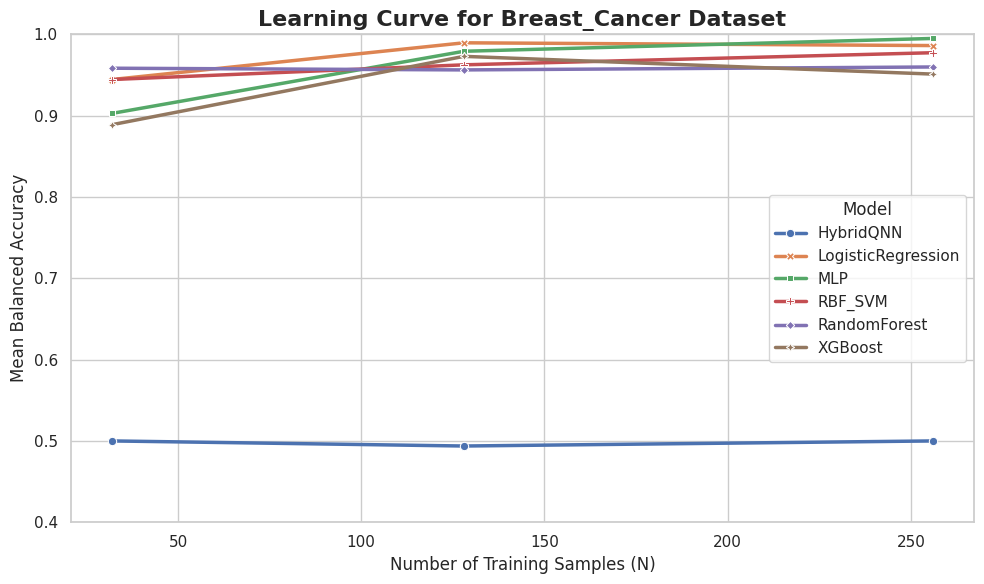

   - Saved plot: learning_curve_Leukemia.png


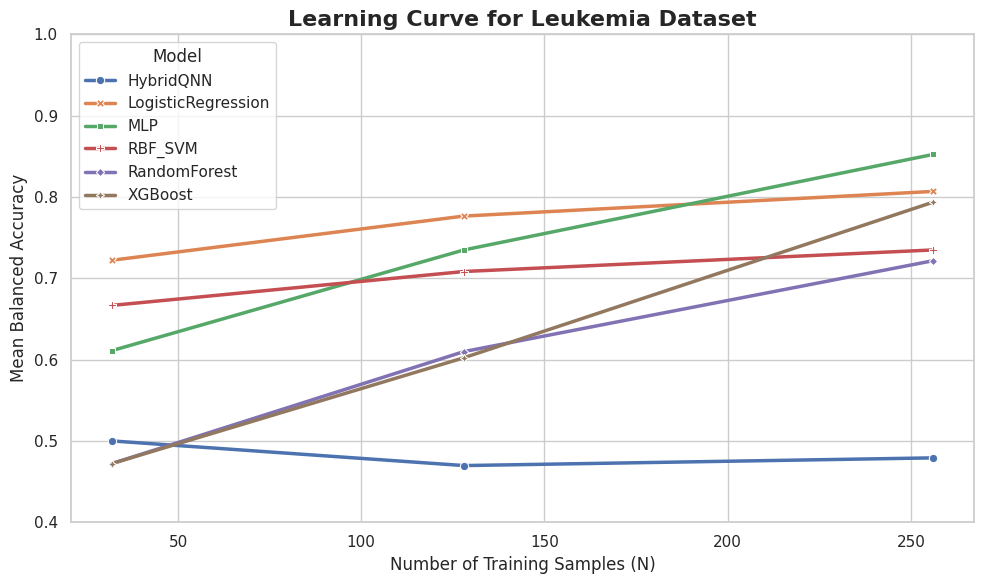

   - Saved plot: learning_curve_Sonar.png


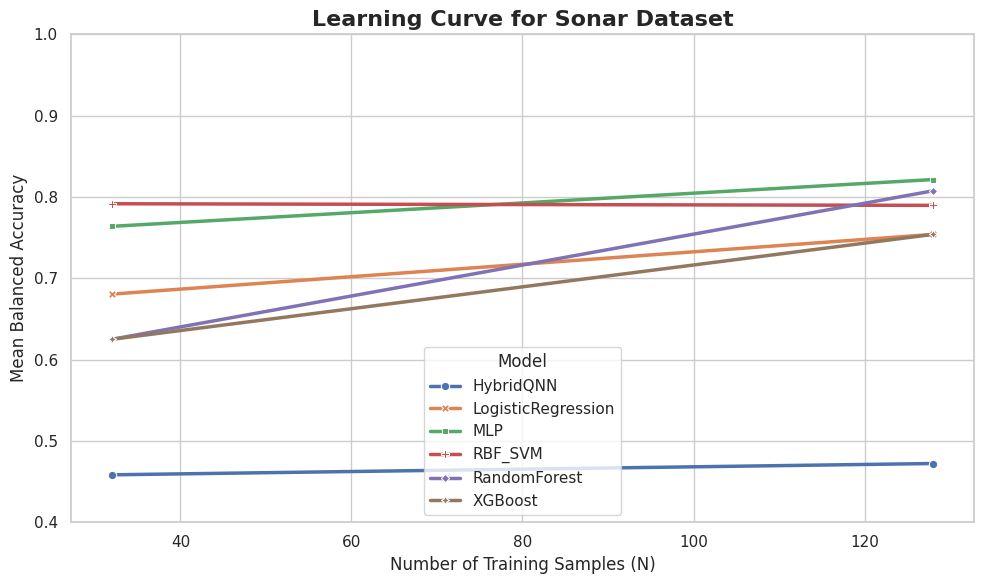

   - Saved plot: fit_time_Breast_Cancer.png


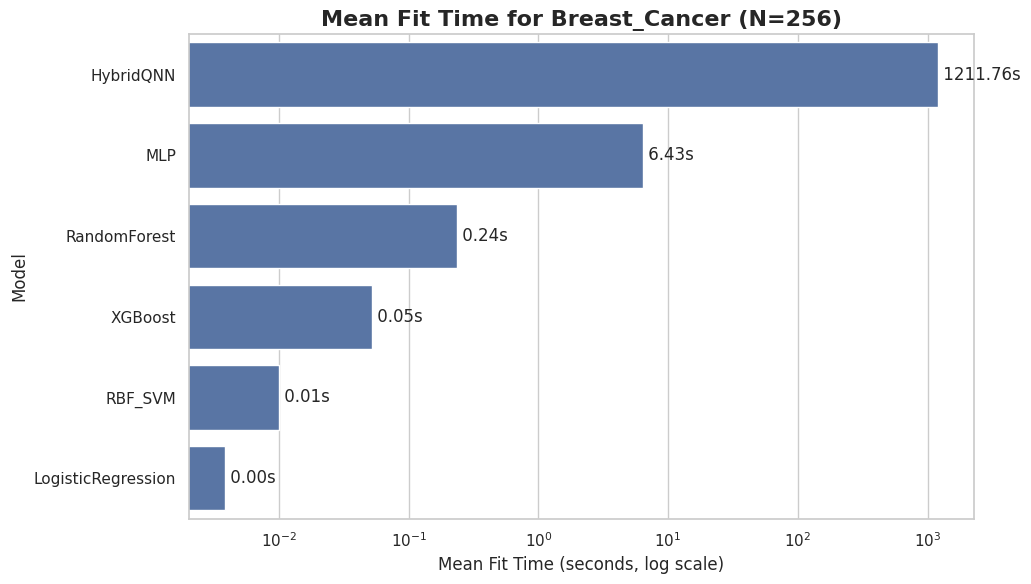

   - Saved plot: fit_time_Leukemia.png


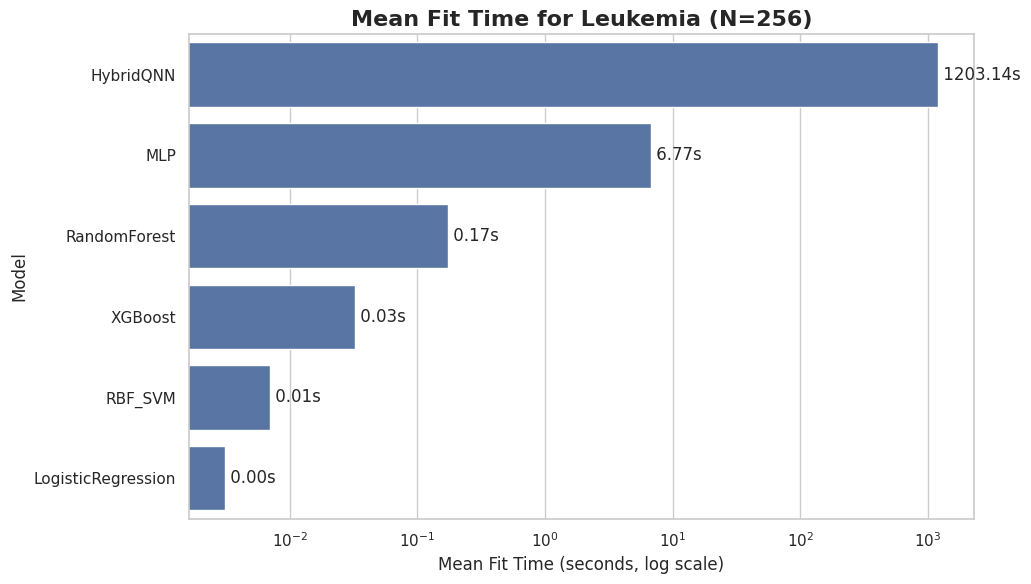

   - Saved plot: fit_time_Sonar.png


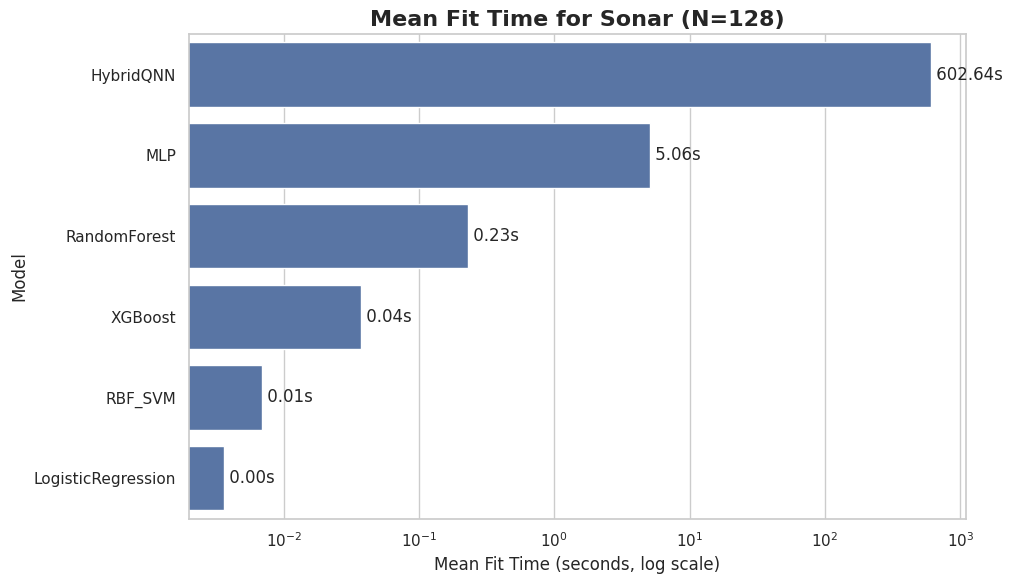

\nAnalysis complete.


In [ ]:
# --- Snippets 8 & 9 (Final Definitive Version): Direct Analysis & Visualization ---

# Step 1: Ensure plotting libraries are available in the native Colab environment
!pip install -q seaborn matplotlib

# Step 2: Run the analysis and plotting code
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
print("--- Snippets 8 & 9: Aggregation, Analysis & Visualization ---")

# --- 1. Load and Process Data ---
try:
    df = pd.read_csv('results.csv')
    print("\\n1. Successfully loaded results.csv")
    print(f"Found {len(df)} total runs in the results file.")
except FileNotFoundError:
    print("ERROR: results.csv not found. Please ensure Snippet 7 completed and the file is in your /content/ directory.")
    exit()

# Aggregate results
df_agg = df.groupby(['dataset', 'n_samples', 'model']).agg(
    mean_test_accuracy=('test_b_accuracy', 'mean'),
    std_test_accuracy=('test_b_accuracy', 'std'),
    mean_fit_time=('fit_time', 'mean')
).reset_index()

# Pivot for comparison
df_pivot = df_agg.pivot_table(
    index=['dataset', 'n_samples'],
    columns='model',
    values='mean_test_accuracy'
)

classical_models = [col for col in df_pivot.columns if col != 'HybridQNN']
df_pivot['best_classical_accuracy'] = df_pivot[classical_models].max(axis=1)
df_pivot['best_classical_model'] = df_pivot[classical_models].idxmax(axis=1)
df_pivot['qml_advantage'] = df_pivot['HybridQNN'] - df_pivot['best_classical_accuracy']

print("\\n--- 2. Aggregated Results Summary ---")
print(df_pivot.round(3))

# --- 3. Visualization ---
print("\\n--- 3. Generating and saving plots ---")
sns.set_theme(style="whitegrid")

# A. Learning Curves
datasets = df_agg['dataset'].unique()
for dataset in datasets:
    plt.figure(figsize=(10, 6))
    dataset_df = df_agg[df_agg['dataset'] == dataset]

    sns.lineplot(
        data=dataset_df,
        x='n_samples',
        y='mean_test_accuracy',
        hue='model',
        style='model',
        markers=True,
        dashes=False,
        linewidth=2.5
    )

    plt.title(f'Learning Curve for {dataset} Dataset', fontsize=16, fontweight='bold')
    plt.xlabel('Number of Training Samples (N)', fontsize=12)
    plt.ylabel('Mean Balanced Accuracy', fontsize=12)
    plt.ylim(0.4, 1.0)
    plt.legend(title='Model')
    plt.tight_layout()

    filename = f'learning_curve_{dataset}.png'
    plt.savefig(filename)
    print(f"   - Saved plot: {filename}")
    plt.show() # Display the plot directly in the notebook
    plt.close()

# B. Fit Time Comparison
for dataset in datasets:
    plt.figure(figsize=(10, 6))

    dataset_times = df_agg[df_agg['dataset'] == dataset]
    if dataset_times.empty: continue
    n_largest = dataset_times['n_samples'].max()
    time_df = dataset_times[dataset_times['n_samples'] == n_largest].sort_values('mean_fit_time', ascending=False)

    sns.barplot(data=time_df, x='mean_fit_time', y='model')

    plt.title(f'Mean Fit Time for {dataset} (N={n_largest})', fontsize=16, fontweight='bold')
    plt.xlabel('Mean Fit Time (seconds, log scale)', fontsize=12)
    plt.ylabel('Model', fontsize=12)
    plt.xscale('log')
    plt.tight_layout()

    for index, value in enumerate(time_df['mean_fit_time']):
        if value > 0:
            plt.text(value, index, f' {value:.2f}s', va='center')

    filename = f'fit_time_{dataset}.png'
    plt.savefig(filename)
    print(f"   - Saved plot: {filename}")
    plt.show() # Display the plot directly in the notebook
    plt.close()

print("\\nAnalysis complete.")

In [ ]:
# --- Snippet 10 (Headless): In-Depth Analysis ---

# Define the Python code for this snippet
headless_analysis_script = """
import pandas as pd
import numpy as np
import os
import time
import warnings
from tqdm.auto import tqdm

# --- Environment and Global Setup ---
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
SEED = 42

# --- Library Imports (NO TENSORFLOW HERE) ---
import torch
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.metrics import balanced_accuracy_score, brier_score_loss
from sklearn.calibration import calibration_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from torch import nn
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit.primitives import Estimator
from qiskit.quantum_info import SparsePauliOp
from qiskit_machine_learning.connectors import TorchConnector
from qiskit_machine_learning.neural_networks import EstimatorQNN

# --- Set Global Seeds ---
np.random.seed(SEED); torch.manual_seed(SEED)
print("--- Snippet 10: In-Depth Model Behavior Analysis (Headless) ---")

# --- 1. Prepare Data for a Representative Case ---
print("\\n1. Preparing data for analysis (Breast Cancer, N=128)...")
NUM_FEATURES = 8
df = pd.read_csv('/content/breast.csv').drop(columns=['id', 'Unnamed: 32'])
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])
X, y = df.drop(columns=['diagnosis']), df['diagnosis']
X_sample, _, y_sample, _ = train_test_split(X, y, train_size=128, stratify=y, random_state=SEED)
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, stratify=y_sample, random_state=SEED)
prep_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler()), ('pca', PCA(n_components=15)), ('selector', SelectKBest(k=NUM_FEATURES))])
X_train_prep = prep_pipeline.fit_transform(X_train, y_train)
X_test_prep = prep_pipeline.transform(X_test)
y_train_np = y_train.values
y_test_np = y_test.values

# --- 2. Analysis Part 1: Memorization Control (Label Shuffling) ---
print("\\n2. Running Label Shuffling experiment...")
y_train_shuffled = np.random.permutation(y_train_np)
rf_memorizer = RandomForestClassifier(random_state=SEED, n_estimators=100, max_depth=None).fit(X_train_prep, y_train_shuffled)
rf_shuffled_acc = balanced_accuracy_score(y_train_shuffled, rf_memorizer.predict(X_train_prep))

device = 'cuda' if torch.cuda.is_available() else 'cpu'
feature_map, ansatz = ZZFeatureMap(NUM_FEATURES), RealAmplitudes(NUM_FEATURES, reps=1)
observable = SparsePauliOp("Z" * NUM_FEATURES)
qiskit_qnn = EstimatorQNN(circuit=feature_map.compose(ansatz), estimator=Estimator(), observables=observable, input_params=feature_map.parameters, weight_params=ansatz.parameters)
torch_qnn = TorchConnector(qiskit_qnn, initial_weights=(2 * np.random.rand(qiskit_qnn.num_weights) - 1))
class HybridQNN(nn.Module):
    def __init__(self, qnn): super().__init__(); self.qnn, self.cls = qnn, nn.Linear(1, 1)
    def forward(self, x): return torch.sigmoid(self.cls(self.qnn(x)))

qnn_memorizer = HybridQNN(torch_qnn).to(device)
X_train_q = torch.tensor(X_train_prep, dtype=torch.float32).to(device)
y_train_shuffled_q = torch.tensor(y_train_shuffled, dtype=torch.float32).reshape(-1, 1).to(device)
optimizer, loss_fn = torch.optim.Adam(qnn_memorizer.parameters(), lr=0.05), torch.nn.BCELoss()
qnn_memorizer.train()
for epoch in tqdm(range(50), desc=f"Training QNN on Shuffled Labels ({device.upper()})"):
    optimizer.zero_grad(); output = qnn_memorizer(X_train_q); loss = loss_fn(output, y_train_shuffled_q); loss.backward(); optimizer.step()
with torch.no_grad():
    qnn_shuffled_preds = (qnn_memorizer(X_train_q) >= 0.5).cpu().numpy()
qnn_shuffled_acc = balanced_accuracy_score(y_train_shuffled, qnn_shuffled_preds)

df_shuffled = pd.DataFrame([{'model': 'RandomForest (Unconstrained)', 'train_accuracy_on_shuffled': rf_shuffled_acc}, {'model': 'HybridQNN', 'train_accuracy_on_shuffled': qnn_shuffled_acc}])
df_shuffled.to_csv('shuffled_results.csv', index=False)
print("\\n--- Label Shuffling Results ---"); print(df_shuffled)

# --- 3. Analysis Part 2: Model Calibration ---
print("\\n3. Running Model Calibration analysis...")
svm = SVC(C=1.0, gamma='scale', random_state=SEED, probability=True).fit(X_train_prep, y_train_np)
qnn_model = HybridQNN(torch_qnn).to(device)
y_train_q = torch.tensor(y_train_np, dtype=torch.float32).reshape(-1, 1).to(device)
optimizer, loss_fn = torch.optim.Adam(qnn_model.parameters(), lr=0.05), torch.nn.BCELoss()
qnn_model.train()
for epoch in tqdm(range(15), desc=f"Training QNN for Calibration ({device.upper()})"):
    optimizer.zero_grad(); output = qnn_model(X_train_q); loss = loss_fn(output, y_train_q); loss.backward(); optimizer.step()

svm_probs = svm.predict_proba(X_test_prep)[:, 1]
with torch.no_grad():
    qnn_probs = qnn_model(torch.tensor(X_test_prep, dtype=torch.float32).to(device)).cpu().numpy().flatten()
brier_svm, brier_qnn = brier_score_loss(y_test_np, svm_probs), brier_score_loss(y_test_np, qnn_probs)
prob_true_svm, prob_pred_svm = calibration_curve(y_test_np, svm_probs, n_bins=5)
prob_true_qnn, prob_pred_qnn = calibration_curve(y_test_np, qnn_probs, n_bins=5)

df_brier = pd.DataFrame([{'model': 'RBF_SVM', 'brier_score': brier_svm}, {'model': 'HybridQNN', 'brier_score': brier_qnn}])
print("\\n--- Brier Score Results (Lower is Better) ---"); print(df_brier)
df_brier.to_csv('brier_results.csv', index=False); np.savez('calibration_data.npz', pts=prob_true_svm, pps=prob_pred_svm, ptq=prob_true_qnn, ppq=prob_pred_qnn)

# --- 4. Analysis Part 3: Feature Noise Robustness ---
print("\\n4. Running Feature Noise Robustness test...")
noise_results = []
models_to_test = {'RBF_SVM': svm, 'HybridQNN': qnn_model}
for name, model in models_to_test.items():
    for noise in [0.0, 0.1, 0.2, 0.3, 0.4]:
        X_test_noisy = X_test_prep + np.random.RandomState(SEED).normal(scale=noise, size=X_test_prep.shape)
        if name == 'HybridQNN':
            model.eval()
            with torch.no_grad(): preds = (model(torch.tensor(X_test_noisy, dtype=torch.float32).to(device)) >= 0.5).cpu().numpy()
        else: preds = model.predict(X_test_noisy)
        noise_results.append({'model': name, 'noise_level': noise, 'accuracy': balanced_accuracy_score(y_test_np, preds)})

df_noise = pd.DataFrame(noise_results)
print("\\n--- Noise Robustness Results ---"); print(df_noise)
df_noise.to_csv('noise_results.csv', index=False)
print("\\nIn-depth numerical analysis complete.")
"""

# Write the script to a file and execute it
with open("run_in_depth_analysis.py", "w") as f:
    f.write(headless_analysis_script)

!source /usr/local/etc/profile.d/conda.sh && conda activate qml_project && python run_in_depth_analysis.py

--- Snippet 10: In-Depth Model Behavior Analysis (Headless) ---

1. Preparing data for analysis (Breast Cancer, N=128)...

2. Running Label Shuffling experiment...
Training QNN on Shuffled Labels (CPU): 100% 50/50 [50:09<00:00, 60.20s/it]

--- Label Shuffling Results ---
                          model  train_accuracy_on_shuffled
0  RandomForest (Unconstrained)                         1.0
1                     HybridQNN                         0.5

3. Running Model Calibration analysis...
Training QNN for Calibration (CPU): 100% 15/15 [15:02<00:00, 60.17s/it]

--- Brier Score Results (Lower is Better) ---
       model  brier_score
0    RBF_SVM     0.021748
1  HybridQNN     0.266673

4. Running Feature Noise Robustness test...

--- Noise Robustness Results ---
       model  noise_level  accuracy
0    RBF_SVM          0.0   1.00000
1    RBF_SVM          0.1   1.00000
2    RBF_SVM          0.2   0.96875
3    RBF_SVM          0.3   0.91875
4    RBF_SVM          0.4   0.91875
5  HybridQNN  

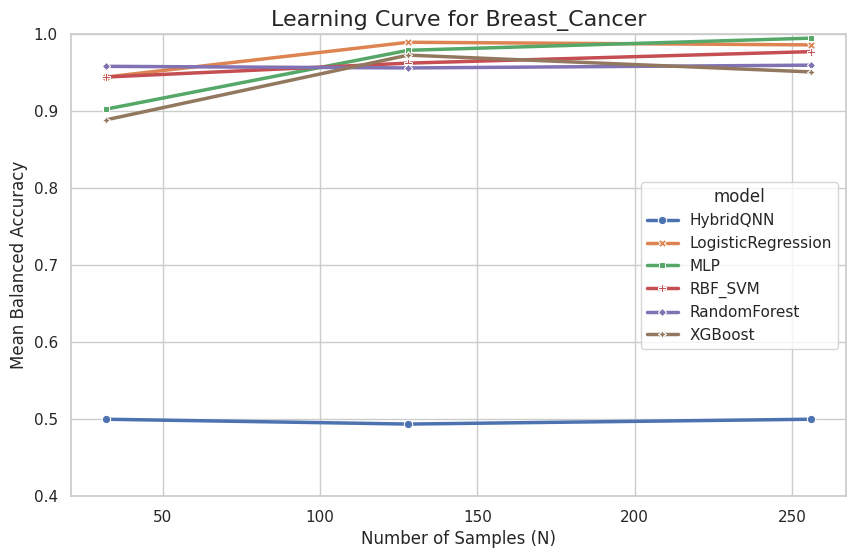

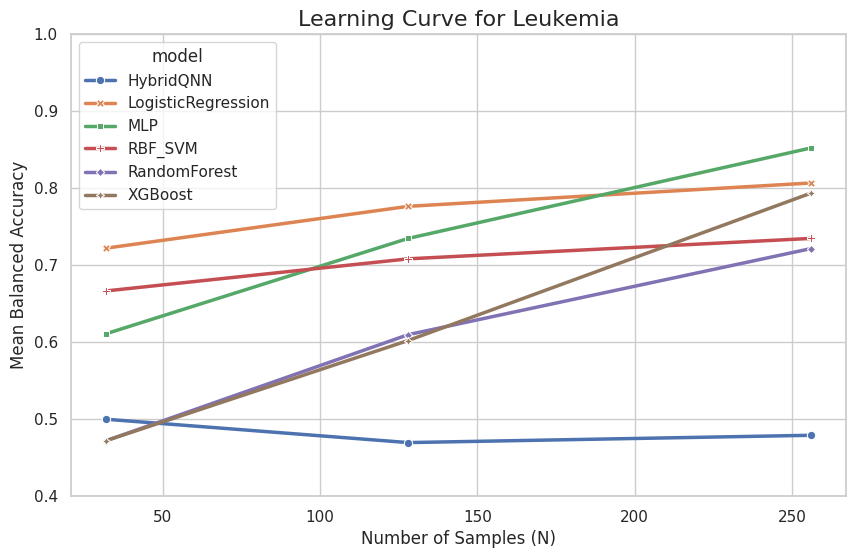

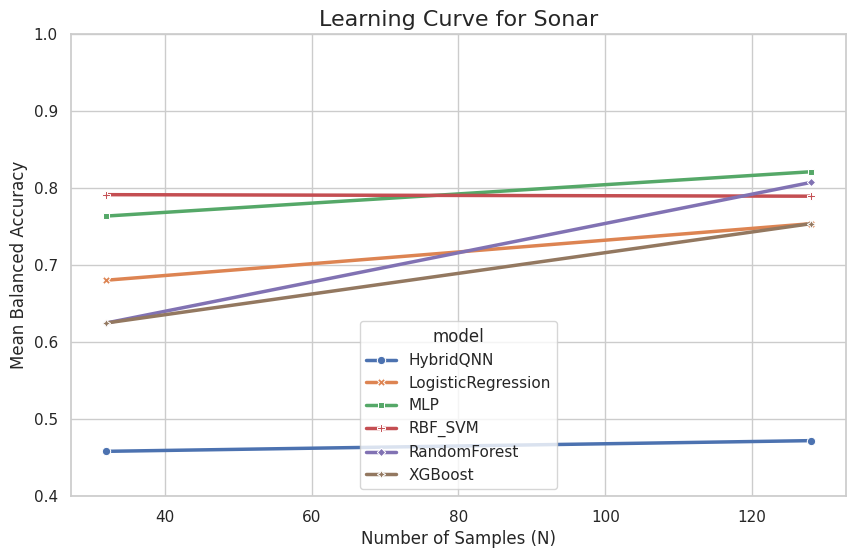

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install -q seaborn
df = pd.read_csv('results.csv')
df_agg = df.groupby(['dataset', 'n_samples', 'model'])['test_b_accuracy'].mean().reset_index()
sns.set_theme(style="whitegrid")
for dataset in df_agg['dataset'].unique():
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df_agg[df_agg['dataset'] == dataset], x='n_samples', y='test_b_accuracy', hue='model', style='model', markers=True, dashes=False, lw=2.5)
    plt.title(f'Learning Curve for {dataset}', fontsize=16)
    plt.ylabel('Mean Balanced Accuracy'); plt.xlabel('Number of Samples (N)'); plt.ylim(0.4, 1.0)
    plt.show()

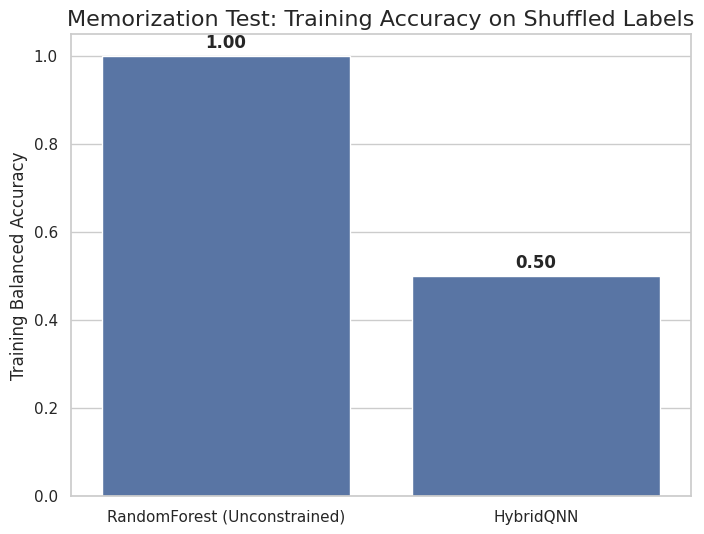

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df_shuffled = pd.read_csv('shuffled_results.csv')
plt.figure(figsize=(8, 6))
sns.barplot(data=df_shuffled, x='model', y='train_accuracy_on_shuffled')
plt.title('Memorization Test: Training Accuracy on Shuffled Labels', fontsize=16)
plt.ylabel('Training Balanced Accuracy'); plt.xlabel('')
plt.ylim(0, 1.05)
for i, v in enumerate(df_shuffled['train_accuracy_on_shuffled']):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()

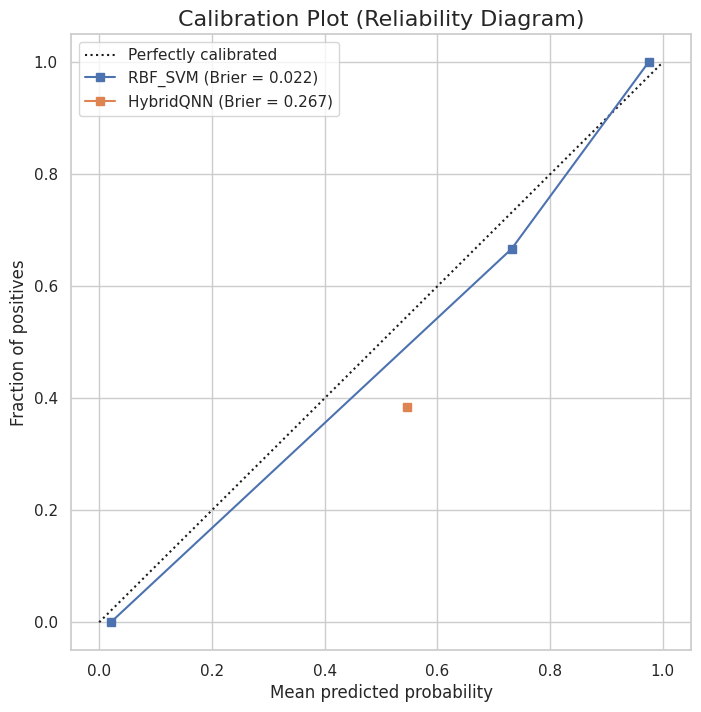

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
brier_scores = pd.read_csv('brier_results.csv')
cal_data = np.load('calibration_data.npz')
brier_svm = brier_scores[brier_scores.model=='RBF_SVM']['brier_score'].iloc[0]
brier_qnn = brier_scores[brier_scores.model=='HybridQNN']['brier_score'].iloc[0]
plt.figure(figsize=(8, 8))
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
plt.plot(cal_data['pps'], cal_data['pts'], "s-", label=f'RBF_SVM (Brier = {brier_svm:.3f})')
plt.plot(cal_data['ppq'], cal_data['ptq'], "s-", label=f'HybridQNN (Brier = {brier_qnn:.3f})')
plt.title('Calibration Plot (Reliability Diagram)', fontsize=16)
plt.ylabel('Fraction of positives'); plt.xlabel('Mean predicted probability')
plt.legend(); plt.show()

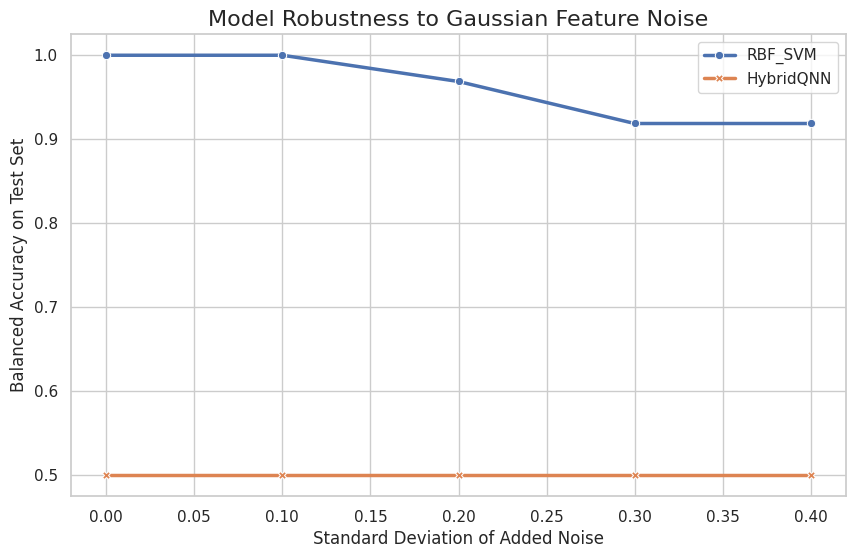

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df_noise = pd.read_csv('noise_results.csv')
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_noise, x='noise_level', y='accuracy', hue='model', style='model', markers=True, dashes=False, lw=2.5)
plt.title('Model Robustness to Gaussian Feature Noise', fontsize=16)
plt.xlabel('Standard Deviation of Added Noise')
plt.ylabel('Balanced Accuracy on Test Set')
plt.legend(); plt.show()